In [16]:
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt


In [3]:
print(tf.__version__)

1.13.1


In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 122s 11us/step


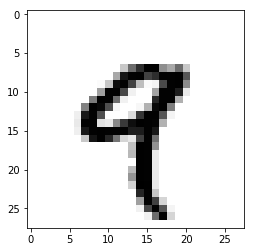

In [23]:
plt.imshow(x_train[4],cmap=plt.cm.binary)
plt.show()

In [24]:
y_train[4]

9

In [25]:
##### Normalizing dataset #######
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)


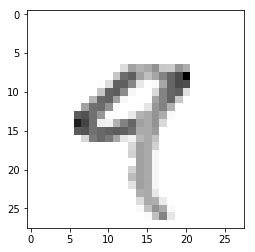

In [27]:
plt.imshow(x_train[4],cmap=plt.cm.binary)  ### 28*28
plt.show()


In [28]:
model=tf.keras.models.Sequential()  #### Setting up keras model


In [29]:
model.add(tf.keras.layers.Flatten())  #### flattening up dataset ####
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) ## Relu function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) ## output layer layers=number of class
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [30]:
model.fit(x_train, y_train, epochs=3)


Epoch 1/3
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2656 - acc: 0.9224
Epoch 2/3
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1088 - acc: 0.9665
Epoch 3/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0751 - acc: 0.9767


In [31]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.0905 - acc: 0.9727
0.09054178221002221
0.9727


In [32]:
predictions =model.predict(x_test)

In [33]:
predictions

array([[7.6577278e-09, 1.0393034e-07, 6.4446635e-06, ..., 9.9998379e-01,
        3.0170032e-08, 5.2017037e-07],
       [1.8583856e-08, 1.0603851e-04, 9.9989069e-01, ..., 4.3839563e-09,
        6.5039302e-07, 2.5250708e-11],
       [6.5225373e-07, 9.9944228e-01, 1.5135511e-05, ..., 2.9073432e-04,
        4.6410783e-05, 3.6420547e-06],
       ...,
       [7.0165806e-10, 2.7200323e-07, 3.1079495e-08, ..., 6.3538964e-06,
        1.2320597e-06, 1.8089333e-05],
       [5.7137175e-08, 1.9521970e-06, 6.0335879e-08, ..., 9.9035140e-07,
        4.0493669e-05, 1.4337718e-09],
       [8.4904053e-07, 1.8464894e-08, 5.3473150e-07, ..., 2.8667715e-10,
        7.4208327e-07, 2.3836640e-07]], dtype=float32)

In [35]:
predictions[0]

array([7.6577278e-09, 1.0393034e-07, 6.4446635e-06, 8.5658066e-06,
       4.9274596e-10, 5.0852975e-07, 9.5051246e-13, 9.9998379e-01,
       3.0170032e-08, 5.2017037e-07], dtype=float32)

In [39]:
np.argmax(predictions[0])

7

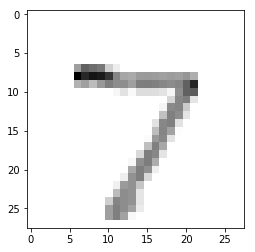

In [40]:
plt.imshow(x_test[0],cmap=plt.cm.binary)  ## to confirm the predictions
plt.show()